In [1]:
# Sample API
import flowx
flowx.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 40, 40
xmin, xmax = 0.0, 1.0
ymin, ymax = 0.0, 1.0

# Define cell-centered variable names
center_vars = ['pres', 'divv', 'asol', 'eror']
face_vars   = ['velc', 'hvar', 'asol', 'eror']
ins_vars      = ['velc', 'hvar', 'divv', 'pres']
poisson_vars  = ['pres', 'divv']

scalar_info   = {'tmax' : 10, 
                 'dt' : 0.01, 
                 'Re' : 100.0}

simulation_info = {'time_stepping' : 'euler', 
                   'poisson_solver' : 'serial_cg', 
                   'with_ib' : False}

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_pres = {'pres': ['neumann', 'neumann', 'neumann', 'neumann']}
bc_val_pres  = {'pres': [0.0, 0.0, 0.0, 0.0]}

bc_type_u = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_u  = {'velc': [0.0, 0.0, 0.0, 1.0]}

bc_type_v = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_v  = {'velc': [0.0, 0.0, 0.0, 0.0]}

gridc, gridx, gridy, scalars, particles = flowx.serial.domain_main(nx, ny, xmin, xmax, ymin, ymax,
                                              center_vars, face_vars, scalar_info,
                                              bc_type_center=bc_type_pres, bc_val_center=bc_val_pres,
                                              bc_type_facex=bc_type_u, bc_val_facex=bc_val_u,
                                              bc_type_facey=bc_type_v, bc_val_facey=bc_val_v)

domain_data_struct = [gridc, gridx, gridy, scalars, particles]

ins = flowx.ins_main(ins_vars, simulation_info)

poisson = flowx.poisson_main(poisson_vars, simulation_info)

imbound = flowx.imbound_main(imbound_info=simulation_info)

In [3]:
while scalars.variable['time'] <= scalars.variable['tmax']:
    
    ins.advance(poisson, imbound, domain_data_struct)
    
    # Display stats
    if scalars.variable['nstep'] % 10 == 0:
        flowx.io.display_stats(scalars)   

    scalars.advance()

------------ Time = 0.0 ---------------
Number of poisson iterations    : 135
Final poisson residual : 6.472843259331042e-10
Max, Min, U   : 2.0, -0.06368604133962313
Max, Min, V   : 0.15978098486373257, -0.15978098486373257
Max, Min, P   : 1.821371010824152, -1.821371010824152
Max, Min, DIV : 2.48670798536077e-08, -2.4867078084189753e-08


------------ Time = 0.09999999999999999 ---------------
Number of poisson iterations    : 141
Final poisson residual : 7.601590763180775e-10
Max, Min, U   : 2.0, -0.13534631166185318
Max, Min, V   : 0.30627577898301417, -0.31416379216731777
Max, Min, P   : 1.1784764770317329, -0.8703871840832381
Max, Min, DIV : 1.922075770766085e-08, -2.4285594313333547e-08


------------ Time = 0.20000000000000004 ---------------
Number of poisson iterations    : 133
Final poisson residual : 8.431899430862598e-10
Max, Min, U   : 2.0, -0.15408001944736835
Max, Min, V   : 0.3200511958860056, -0.3718032232049744
Max, Min, P   : 1.1785200087894938, -0.7890553244568171


------------ Time = 2.399999999999993 ---------------
Number of poisson iterations    : 112
Final poisson residual : 7.197163914560411e-10
Max, Min, U   : 2.0, -0.23230420612776287
Max, Min, V   : 0.3459373498787299, -0.5065731998744599
Max, Min, P   : 1.2931876453231497, -0.6897335069153049
Max, Min, DIV : 2.310720635667618e-08, -2.669821336231948e-08


------------ Time = 2.4999999999999907 ---------------
Number of poisson iterations    : 112
Final poisson residual : 7.324565257276008e-10
Max, Min, U   : 2.0, -0.2329690963703316
Max, Min, V   : 0.34597736993839984, -0.5075870958857085
Max, Min, P   : 1.2944302815772835, -0.6894631347509147
Max, Min, DIV : 2.2938203170230764e-08, -2.277469934863774e-08


------------ Time = 2.5999999999999885 ---------------
Number of poisson iterations    : 112
Final poisson residual : 6.506927722231787e-10
Max, Min, U   : 2.0, -0.23342406912810879
Max, Min, V   : 0.3460132468329782, -0.50849679962911
Max, Min, P   : 1.2955830215024906, -0.689218153

------------ Time = 4.799999999999942 ---------------
Number of poisson iterations    : 106
Final poisson residual : 7.639153995919318e-10
Max, Min, U   : 2.0, -0.23779218593369286
Max, Min, V   : 0.3463419490113337, -0.516843637078169
Max, Min, P   : 1.308585851231583, -0.6866800848044027
Max, Min, DIV : 2.3418288419563282e-08, -2.7019670945094276e-08


------------ Time = 4.89999999999994 ---------------
Number of poisson iterations    : 105
Final poisson residual : 9.504351591292105e-10
Max, Min, U   : 2.0, -0.23784200757841775
Max, Min, V   : 0.34634763735219976, -0.516989247528864
Max, Min, P   : 1.308865390411513, -0.6866266367033602
Max, Min, DIV : 2.3680218341759485e-08, -3.1625446567096205e-08


------------ Time = 4.999999999999938 ---------------
Number of poisson iterations    : 105
Final poisson residual : 8.618192423099133e-10
Max, Min, U   : 2.0, -0.23788259773437967
Max, Min, V   : 0.3463529713307735, -0.5171259191915512
Max, Min, P   : 1.309129804194732, -0.68657602435

------------ Time = 7.099999999999893 ---------------
Number of poisson iterations    : 97
Final poisson residual : 8.548995405283661e-10
Max, Min, U   : 2.0, -0.2392402717561199
Max, Min, V   : 0.3464142237868887, -0.5187079288210904
Max, Min, P   : 1.3123360843214738, -0.6859569277115045
Max, Min, DIV : 2.2764571727673655e-08, -2.39417183300894e-08


------------ Time = 7.199999999999891 ---------------
Number of poisson iterations    : 97
Final poisson residual : 7.678082639378471e-10
Max, Min, U   : 2.0, -0.23927521605300886
Max, Min, V   : 0.3464156659956992, -0.5187455367579994
Max, Min, P   : 1.312415575281716, -0.6859414020771504
Max, Min, DIV : 2.392412351559514e-08, -2.0691851898568814e-08


------------ Time = 7.299999999999889 ---------------
Number of poisson iterations    : 97
Final poisson residual : 6.681681996502446e-10
Max, Min, U   : 2.0, -0.23930789268476735
Max, Min, V   : 0.34641702886243175, -0.5187810948224156
Max, Min, P   : 1.3124908715988337, -0.6859266824885

------------ Time = 9.499999999999842 ---------------
Number of poisson iterations    : 85
Final poisson residual : 9.218508217545161e-10
Max, Min, U   : 2.0, -0.23968386159380442
Max, Min, V   : 0.34643381886025054, -0.5192207974581232
Max, Min, P   : 1.3134328286465158, -0.6857410492190851
Max, Min, DIV : 2.5234192867207295e-08, -2.377335950320969e-08


------------ Time = 9.59999999999984 ---------------
Number of poisson iterations    : 84
Final poisson residual : 9.748114892107591e-10
Max, Min, U   : 2.0, -0.23969184590668446
Max, Min, V   : 0.3464341996294055, -0.5192308087540118
Max, Min, P   : 1.3134545018319035, -0.6857367344028534
Max, Min, DIV : 2.81495043941149e-08, -2.7276141900678397e-08


------------ Time = 9.699999999999838 ---------------
Number of poisson iterations    : 84
Final poisson residual : 8.775674051750757e-10
Max, Min, U   : 2.0, -0.23969938421435238
Max, Min, V   : 0.3464345601590508, -0.5192402884984901
Max, Min, P   : 1.3134750330786498, -0.685732644543

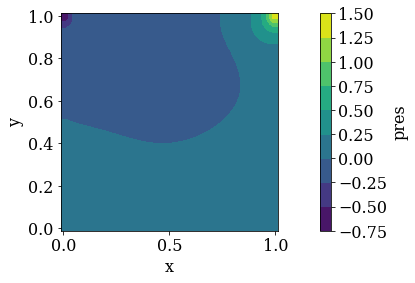

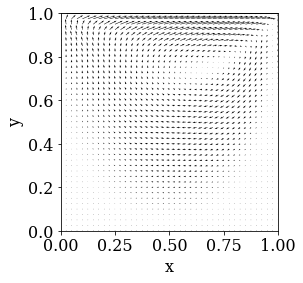

In [4]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_vector(gridx,gridy,'velc')